In [26]:
#Image segmentation is the process of dividing the image into parts
#We will cluster together most dominant 'K' colours
#Then we can go over each pixel and relate it to closest colour

In [27]:
#We will do it for various values of K
#Say we do it for just two colours, we will get poor image because it can use only two colours
#But when we use a bigger K we can get a better image

In [28]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd 
import numpy as np

In [38]:
im= cv2.imread("God.jpg") #Reading the image
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB) #Converting BGR to RGB image
original = im.shape
print(im.shape)

(720, 1280, 3)


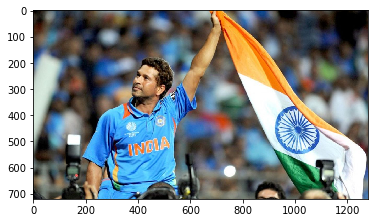

In [30]:
plt.imshow(im) # as RGB Format
plt.show()

In [31]:
# Flatten Each pixel of the image for all the three layers
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)
#Now we have RCB, so we will take every pixel and pick a cluster for it
#The center of cluster is a colour which will be RGB value ie an array with 3 coordinates

(921600, 3)


In [ ]:

from sklearn.cluster import KMeans
colours = 10 #We decide how many different colours we want
km = KMeans(n_clusters=colours)
km.fit(all_pixels)

In [ ]:
centers = km.cluster_centers_
centers = np.array(centers,dtype='uint8') #Display all centers and converting it into integer
print(centers)

In [ ]:
i = 1

plt.figure(0,figsize=(8,2)) #It is whole figure, size doesn't matter a lot


colors = []

for each_col in centers:
    plt.subplot(1,colours,i) #It will keep taking next colour
    plt.axis("off") #So it doesn't show axis numbers
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8') #Craeting a blank array where we can put the required colour
    a[:,:,:] = each_col #Then putting colour in that array
    plt.imshow(a) #Showing colours
    
plt.show()

In [ ]:
image = np.zeros((921600,3),dtype='uint8') #Creating required array where we will put image
print(image.shape)

In [ ]:
print(colors)

In [ ]:
print(km.labels_)

In [ ]:
#We need to assign a colour to every pixel which we will do using labels
for i in range(image.shape[0]):
    image[i]=colors[km.labels_[i]]
image = image.reshape((original)) #Those pixels converted into original shape
plt.imshow(image)
plt.show()
#Image looking better better at colours = 10 than it was at colours at 5
#It will look even better if we take more colours but it will take a lot of time